<a href="https://colab.research.google.com/github/EduardoFoncescaFinardi/DA_IA_IOT/blob/main/SPRINT_3_IA_IOT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [37]:
path = '/content/marketing_campaign.csv'
df = pd.read_csv(path, sep='\t')
pd.set_option('display.max_columns', 29)

df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0


In [38]:
df_sub = df.drop(columns=["ID", "Recency",'Dt_Customer', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                          'MntSweetProducts', 'AcceptedCmp3','MntGoldProds', 'AcceptedCmp4', 'AcceptedCmp5',
                          'AcceptedCmp2', 'AcceptedCmp1', 'Response', 'Z_CostContact', 'Z_Revenue'])
df_sub.head(10)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain
0,1957,Graduation,Single,58138.0,0,0,3,8,10,4,7,0
1,1954,Graduation,Single,46344.0,1,1,2,1,1,2,5,0
2,1965,Graduation,Together,71613.0,0,0,1,8,2,10,4,0
3,1984,Graduation,Together,26646.0,1,0,2,2,0,4,6,0
4,1981,PhD,Married,58293.0,1,0,5,5,3,6,5,0
5,1967,Master,Together,62513.0,0,1,2,6,4,10,6,0
6,1971,Graduation,Divorced,55635.0,0,1,4,7,3,7,6,0
7,1985,PhD,Married,33454.0,1,0,2,4,0,4,8,0
8,1974,PhD,Together,30351.0,1,0,1,3,0,2,9,0
9,1950,PhD,Together,5648.0,1,1,1,1,0,0,20,0


In [39]:
print("Valores únicos em Education:", df_sub['Education'].unique())
print("Valores únicos em Marital_Status:", df_sub['Marital_Status'].unique())

Valores únicos em Education: ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
Valores únicos em Marital_Status: ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


In [40]:
education_mapping = {
    'Basic': 1,
    '2n Cycle': 2,
    'Graduation': 3,
    'Master': 4,
    'PhD': 5
}

marital_status_mapping = {
    'Single': 1,
    'Married': 2,
    'Together': 3,
    'Divorced': 4,
    'Widow': 5,
    'Alone' : 6,
    'Absurd' : 7,
    'YOLO' : 8
}

df_sub['Education'] = df_sub['Education'].map(education_mapping)
df_sub['Marital_Status'] = df_sub['Marital_Status'].map(marital_status_mapping)

print(df_sub[['Education', 'Marital_Status']].head(10))

   Education  Marital_Status
0          3               1
1          3               1
2          3               3
3          3               3
4          5               2
5          4               3
6          3               4
7          5               2
8          5               3
9          5               3


In [41]:
df_sub.head(10)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain
0,1957,3,1,58138.0,0,0,3,8,10,4,7,0
1,1954,3,1,46344.0,1,1,2,1,1,2,5,0
2,1965,3,3,71613.0,0,0,1,8,2,10,4,0
3,1984,3,3,26646.0,1,0,2,2,0,4,6,0
4,1981,5,2,58293.0,1,0,5,5,3,6,5,0
5,1967,4,3,62513.0,0,1,2,6,4,10,6,0
6,1971,3,4,55635.0,0,1,4,7,3,7,6,0
7,1985,5,2,33454.0,1,0,2,4,0,4,8,0
8,1974,5,3,30351.0,1,0,1,3,0,2,9,0
9,1950,5,3,5648.0,1,1,1,1,0,0,20,0


In [42]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   int64  
 2   Marital_Status       2240 non-null   int64  
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   NumDealsPurchases    2240 non-null   int64  
 7   NumWebPurchases      2240 non-null   int64  
 8   NumCatalogPurchases  2240 non-null   int64  
 9   NumStorePurchases    2240 non-null   int64  
 10  NumWebVisitsMonth    2240 non-null   int64  
 11  Complain             2240 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 210.1 KB


In [43]:
df_sub.describe()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain
count,2240.000000,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1968.805804,3.460268,2.370089,52247.251354,0.444196,0.506250,2.325000,4.084821,2.662054,5.790179,5.316518,0.009375
std,11.984069,1.004337,1.065978,25173.076661,0.538398,0.544538,1.932238,2.778714,2.923101,3.250958,2.426645,0.096391
min,1893.000000,1.000000,1.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,3.000000,2.000000,35303.000000,0.000000,0.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000
50%,1970.000000,3.000000,2.000000,51381.500000,0.000000,0.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000
75%,1977.000000,4.000000,3.000000,68522.000000,1.000000,1.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000
max,1996.000000,5.000000,8.000000,666666.000000,2.000000,2.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000


In [44]:
from datetime import datetime
year = datetime.today().year
age= year - df_sub['Year_Birth']
df_sub['Age'] = age


df_sub_2 = df_sub.drop(columns=['Year_Birth'])
df_sub_2.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Age
0,3,1,58138.0,0,0,3,8,10,4,7,0,67
1,3,1,46344.0,1,1,2,1,1,2,5,0,70
2,3,3,71613.0,0,0,1,8,2,10,4,0,59
3,3,3,26646.0,1,0,2,2,0,4,6,0,40
4,5,2,58293.0,1,0,5,5,3,6,5,0,43


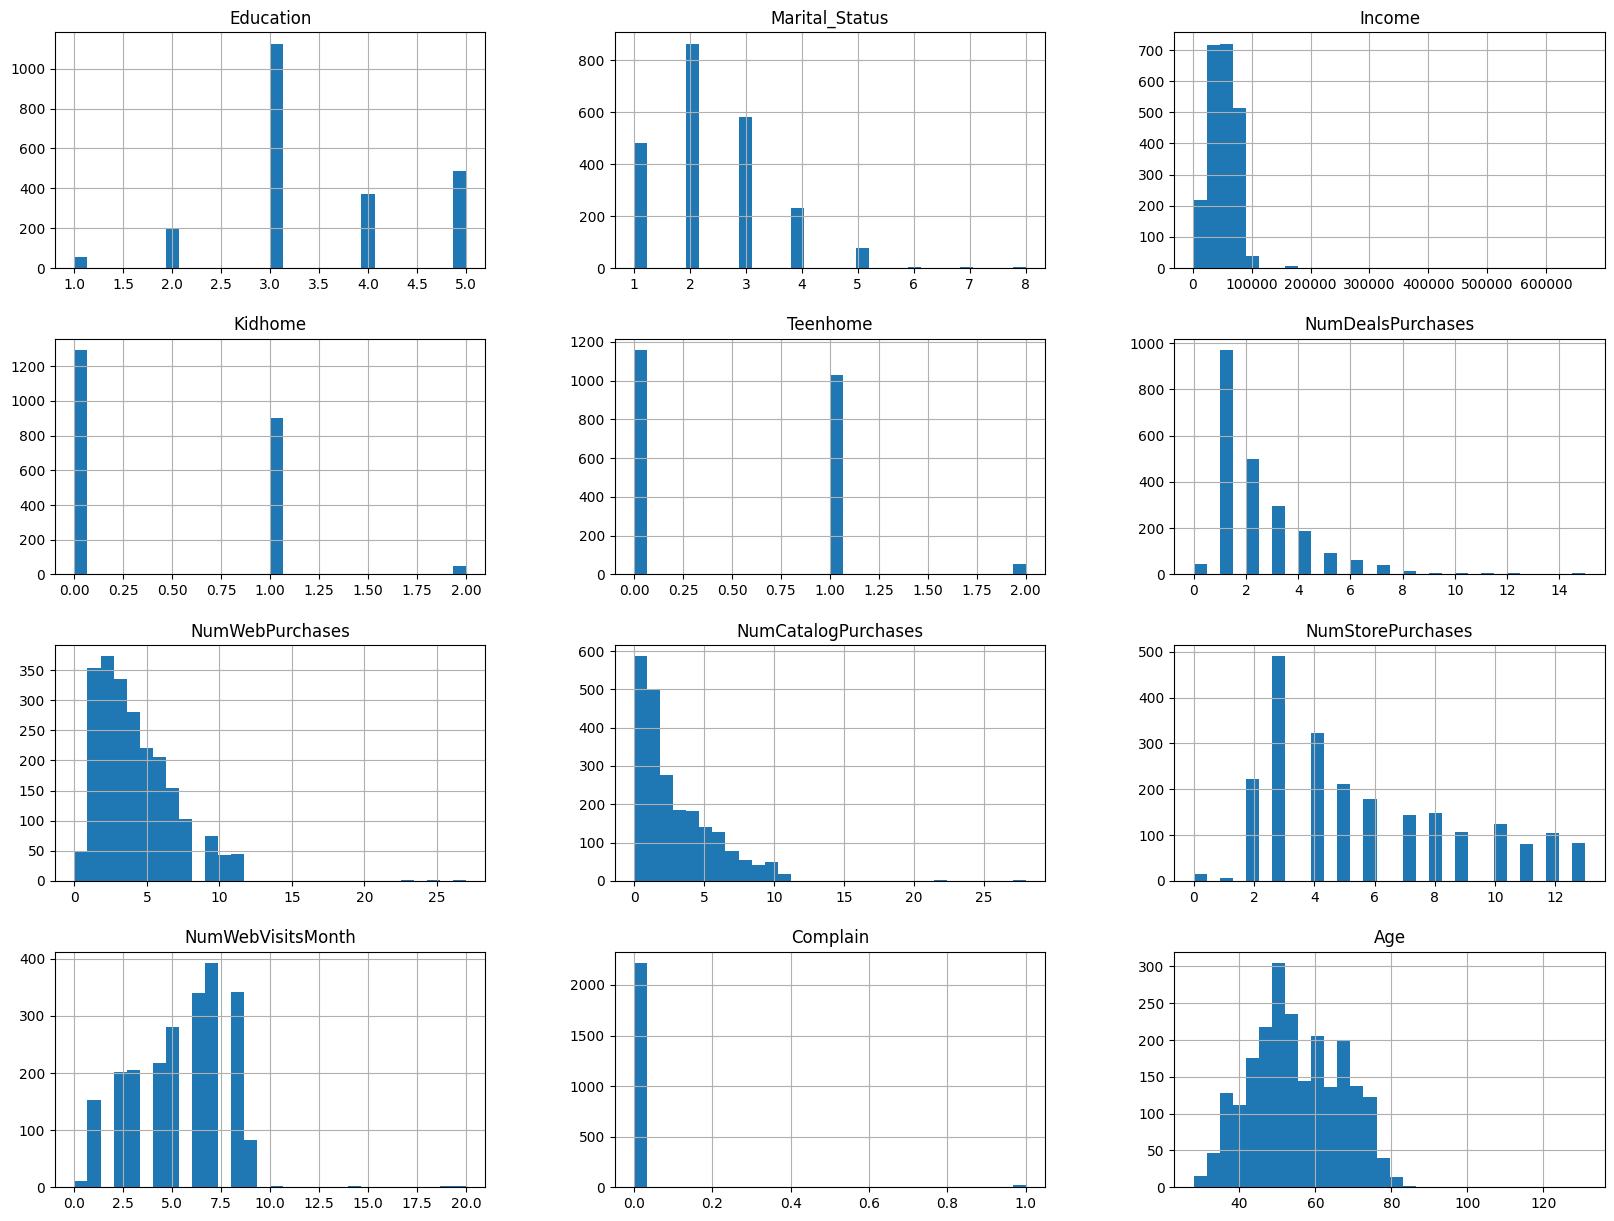

In [45]:
df_sub_2.hist(bins=30, figsize=(20, 15))
plt.show()

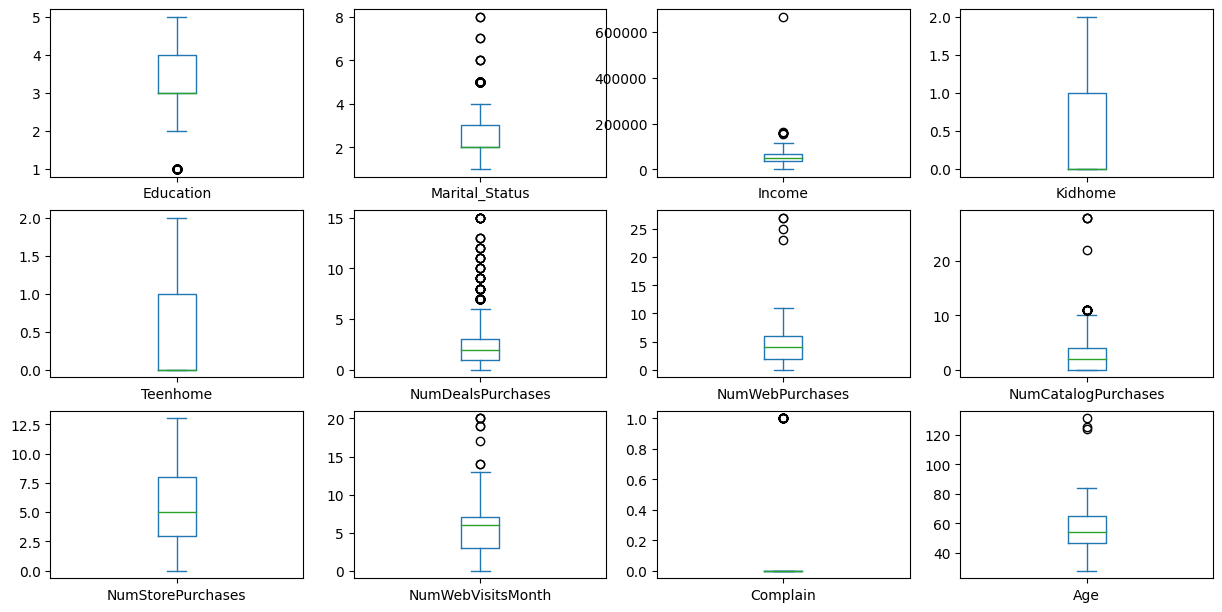

In [132]:
df_sub_2.plot(kind='box', subplots=True, layout=(4,4), figsize=(15,10))
plt.show()

In [46]:
grafico = px.box(df_sub_2, y='Income')
grafico.show()

In [47]:
df_sub_2.query("Income > 140000")

,Education,Marital_Status,Income,Kidhome,Teenhome,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Age
164,5,2,157243.0,0,1,15,0,22,0,0,0,51
617,5,3,162397.0,1,1,0,0,0,1,1,0,48
655,3,4,153924.0,0,0,0,0,0,0,0,0,49
687,5,2,160803.0,0,0,15,0,28,1,0,0,42
1300,4,3,157733.0,1,0,0,1,0,1,1,0,53
1653,3,3,157146.0,0,0,0,0,28,0,1,0,47
2132,5,2,156924.0,0,0,0,0,0,0,0,0,75
2233,3,3,666666.0,1,0,4,3,1,3,6,0,47


In [48]:
df_sub_3 = df_sub_2.drop([164,617,655,687,1300,1653,2132,2233])

In [49]:
df_sub_3.isnull().sum()

,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
NumDealsPurchases,0
NumWebPurchases,0
NumCatalogPurchases,0
NumStorePurchases,0
NumWebVisitsMonth,0


In [50]:
df_sub_3['Income'].fillna(df_sub_3['Income'].mean(), inplace = True)

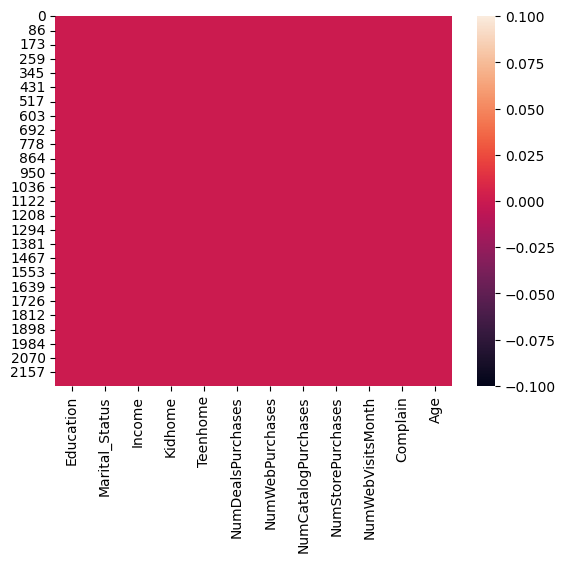

In [51]:
sns.heatmap(df_sub_3.isnull());

In [52]:
grafico = px.box(df_sub_3, y='Age')
grafico.show()

In [53]:
df_sub_3.loc[df_sub_3['Age'] > 81]

,Education,Marital_Status,Income,Kidhome,Teenhome,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Age
192,2,4,36640.0,1,0,1,2,1,2,5,1,124
239,2,1,60182.0,0,1,1,1,0,2,4,0,131
339,5,3,83532.0,0,0,1,4,6,4,1,0,125
424,5,2,93027.0,0,0,0,7,10,5,2,0,83
1950,5,1,51141.0,0,0,1,3,1,4,5,0,84


In [54]:
df_sub_4 = df_sub_3.drop([192,239,339])

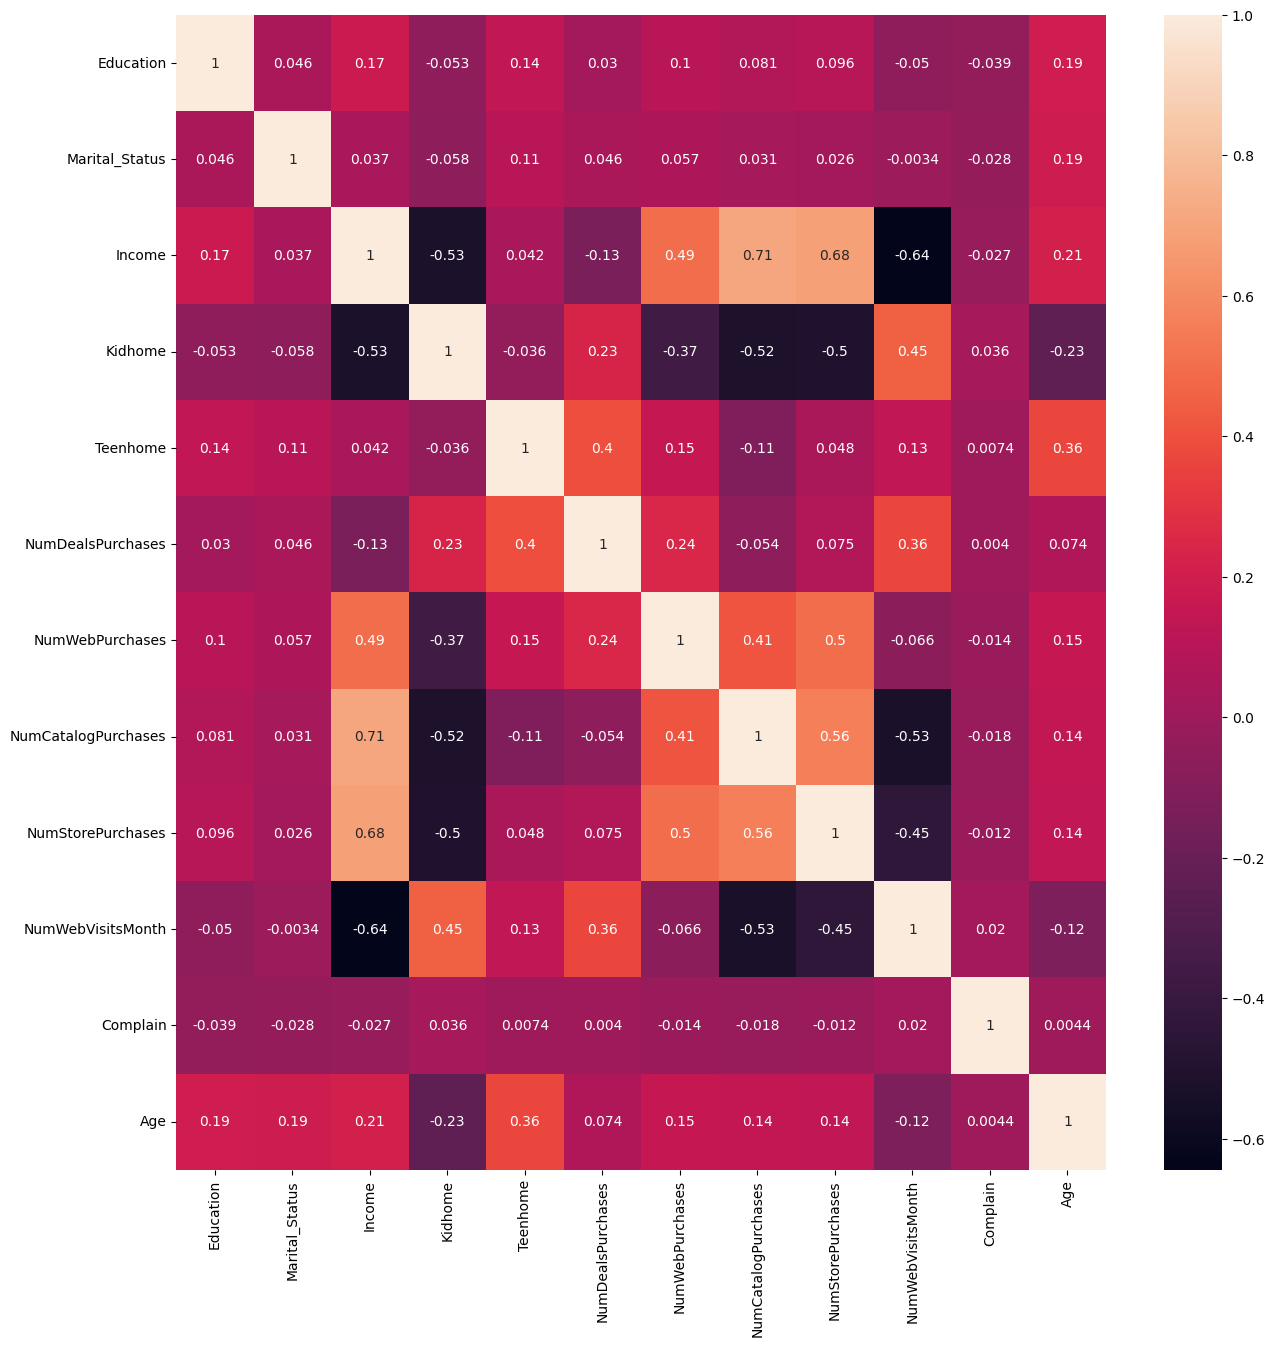

In [55]:
correlations = df_sub_4.corr()
f, ax = plt.subplots(figsize = (15,15))
sns.heatmap(correlations, annot=True)
correlations.round(2);

In [56]:
df_sub_4['Young'] = df_sub_4.apply(lambda x: x['Teenhome'] + x['Kidhome'], axis=1)
df_test = df_sub_4.drop(columns=['Kidhome',	'Teenhome'])
df_test.head(2)

,Education,Marital_Status,Income,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Age,Young
0,3,1,58138.0,3,8,10,4,7,0,67,0.0
1,3,1,46344.0,2,1,1,2,5,0,70,2.0


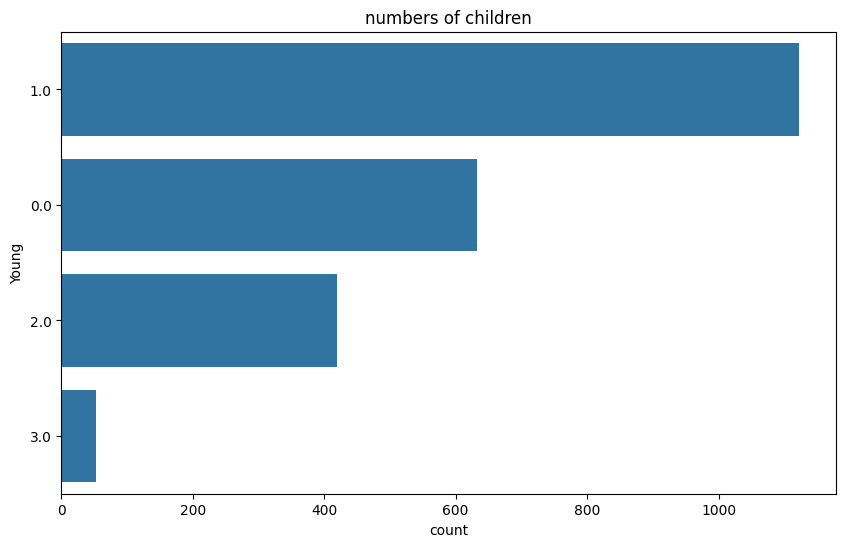

In [57]:
plt.figure(figsize=(10,6))
sns.countplot(y="Young", data=df_test, order=df_test["Young"].value_counts().index)
plt.title("numbers of children");

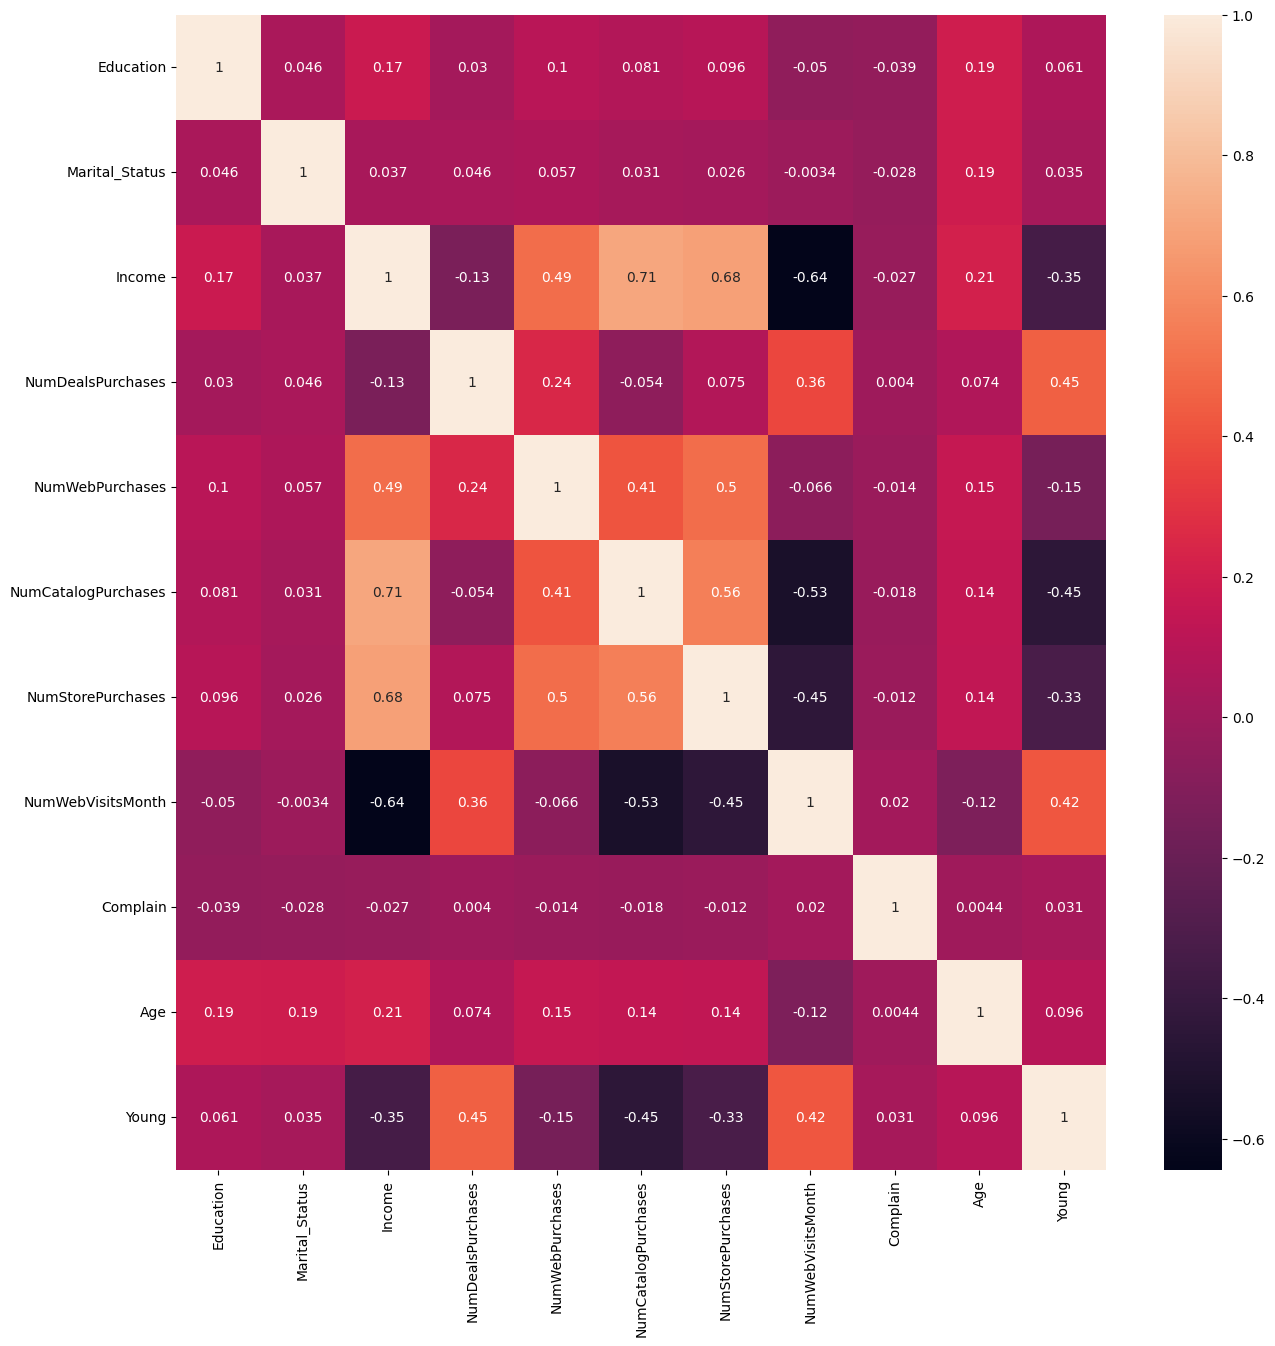

In [59]:
correlations = df_test.corr()
f, ax = plt.subplots(figsize = (15,15))
sns.heatmap(correlations, annot=True)
correlations.round(2);

# **TESTE ML - **

In [58]:
features = ['Age', 'Education', 'Marital_Status', 'Income', 'Young',
            'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
            'NumWebVisitsMonth', 'Complain']

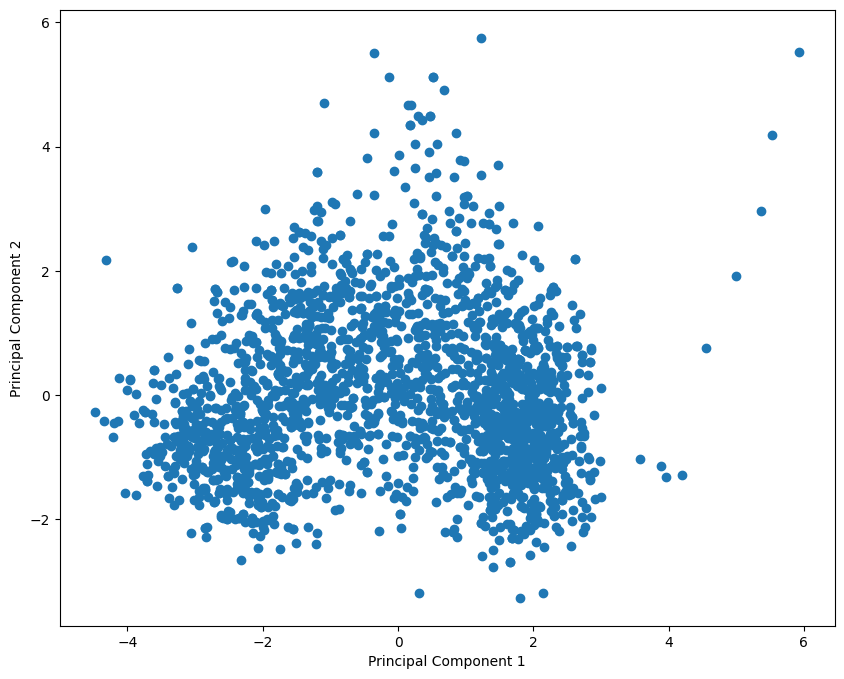

In [204]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

features = ['Age', 'Education', 'Marital_Status', 'Income', 'Young',
            'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
            'NumWebVisitsMonth', 'Complain']
x = df_test.loc[:, features].values
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principaldf_test = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])

plt.figure(figsize=(10,8))
plt.scatter(principaldf_test['principal component 1'], principaldf_test['principal component 2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [205]:
from sklearn.preprocessing import MinMaxScaler

df_test_1 = pd.get_dummies(df_test, columns=['NumWebVisitsMonth', 'NumCatalogPurchases', 'NumStorePurchases'])

print(df_test_1.columns)

features = ['Income',
            'Age', 'Young', 'Complain', 'Marital_Status', 'NumWebPurchases', 'NumDealsPurchases', 'NumWebVisitsMonth_0', 'NumWebVisitsMonth_1', 'NumWebVisitsMonth_2',
       'NumWebVisitsMonth_3', 'NumWebVisitsMonth_4', 'NumWebVisitsMonth_5',
       'NumWebVisitsMonth_6', 'NumWebVisitsMonth_7', 'NumWebVisitsMonth_8',
       'NumWebVisitsMonth_9', 'NumWebVisitsMonth_10', 'NumWebVisitsMonth_13',
       'NumWebVisitsMonth_14', 'NumWebVisitsMonth_17', 'NumWebVisitsMonth_19',
       'NumWebVisitsMonth_20', 'NumCatalogPurchases_0',
       'NumCatalogPurchases_1', 'NumCatalogPurchases_2',
       'NumCatalogPurchases_3', 'NumCatalogPurchases_4',
       'NumCatalogPurchases_5', 'NumCatalogPurchases_6',
       'NumCatalogPurchases_7', 'NumCatalogPurchases_8',
       'NumCatalogPurchases_9', 'NumCatalogPurchases_10',
       'NumCatalogPurchases_11', 'NumCatalogPurchases_28', 'NumStorePurchases_0', 'NumStorePurchases_1',
       'NumStorePurchases_2', 'NumStorePurchases_3', 'NumStorePurchases_4',
       'NumStorePurchases_5', 'NumStorePurchases_6', 'NumStorePurchases_7',
       'NumStorePurchases_8', 'NumStorePurchases_9', 'NumStorePurchases_10',
       'NumStorePurchases_11', 'NumStorePurchases_12', 'NumStorePurchases_13']

scaler = MinMaxScaler()
df_test_1[features] = scaler.fit_transform(df_test_1[features])

Index(['Education', 'Marital_Status', 'Income', 'NumDealsPurchases',
       'NumWebPurchases', 'Complain', 'Age', 'Young', 'NumWebVisitsMonth_0',
       'NumWebVisitsMonth_1', 'NumWebVisitsMonth_2', 'NumWebVisitsMonth_3',
       'NumWebVisitsMonth_4', 'NumWebVisitsMonth_5', 'NumWebVisitsMonth_6',
       'NumWebVisitsMonth_7', 'NumWebVisitsMonth_8', 'NumWebVisitsMonth_9',
       'NumWebVisitsMonth_10', 'NumWebVisitsMonth_13', 'NumWebVisitsMonth_14',
       'NumWebVisitsMonth_17', 'NumWebVisitsMonth_19', 'NumWebVisitsMonth_20',
       'NumCatalogPurchases_0', 'NumCatalogPurchases_1',
       'NumCatalogPurchases_2', 'NumCatalogPurchases_3',
       'NumCatalogPurchases_4', 'NumCatalogPurchases_5',
       'NumCatalogPurchases_6', 'NumCatalogPurchases_7',
       'NumCatalogPurchases_8', 'NumCatalogPurchases_9',
       'NumCatalogPurchases_10', 'NumCatalogPurchases_11',
       'NumCatalogPurchases_28', 'NumStorePurchases_0', 'NumStorePurchases_1',
       'NumStorePurchases_2', 'NumStorePurcha

In [206]:
df_test_1.head(10)

,Education,Marital_Status,Income,NumDealsPurchases,NumWebPurchases,Complain,Age,Young,NumWebVisitsMonth_0,NumWebVisitsMonth_1,NumWebVisitsMonth_2,NumWebVisitsMonth_3,NumWebVisitsMonth_4,NumWebVisitsMonth_5,...,NumStorePurchases_0,NumStorePurchases_1,NumStorePurchases_2,NumStorePurchases_3,NumStorePurchases_4,NumStorePurchases_5,NumStorePurchases_6,NumStorePurchases_7,NumStorePurchases_8,NumStorePurchases_9,NumStorePurchases_10,NumStorePurchases_11,NumStorePurchases_12,NumStorePurchases_13
0,3,0.000000,0.503625,0.200000,0.296296,0.0,0.696429,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3,0.000000,0.398325,0.133333,0.037037,0.0,0.750000,0.666667,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0.285714,0.623933,0.066667,0.296296,0.0,0.553571,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,3,0.285714,0.222456,0.133333,0.074074,0.0,0.214286,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0.142857,0.505009,0.333333,0.185185,0.0,0.267857,0.333333,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4,0.285714,0.542686,0.133333,0.222222,0.0,0.517857,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,3,0.428571,0.481277,0.266667,0.259259,0.0,0.446429,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,5,0.142857,0.283240,0.133333,0.148148,0.0,0.196429,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,5,0.285714,0.255536,0.066667,0.111111,0.0,0.392857,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,5,0.285714,0.034981,0.066667,0.037037,0.0,0.821429,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


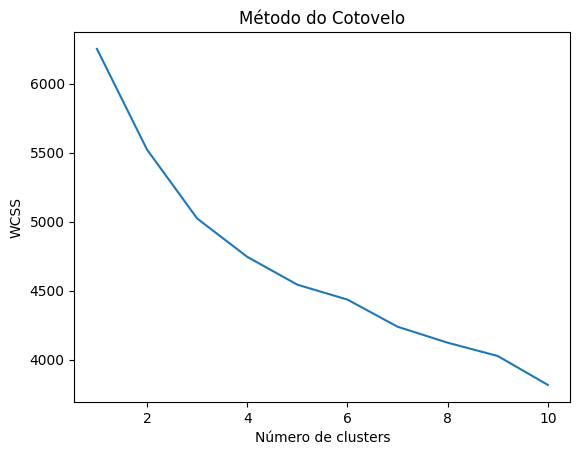

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [221]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_test_1[features])
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Método do Cotovelo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()

kmeans = KMeans(n_clusters=4, random_state=0).fit(df_test_1[features])
df_test_1['Cluster'] = kmeans.labels_

In [227]:
n_clusters = 4

kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(x)

In [228]:
df_test_1['Cluster'] = cluster_labels

In [229]:
cluster_analysis = df_test_1.groupby('Cluster').mean()
cluster_analysis

,Education,Marital_Status,Income,NumDealsPurchases,NumWebPurchases,Complain,Age,Young,NumWebVisitsMonth_0,NumWebVisitsMonth_1,NumWebVisitsMonth_2,NumWebVisitsMonth_3,NumWebVisitsMonth_4,NumWebVisitsMonth_5,...,NumStorePurchases_0,NumStorePurchases_1,NumStorePurchases_2,NumStorePurchases_3,NumStorePurchases_4,NumStorePurchases_5,NumStorePurchases_6,NumStorePurchases_7,NumStorePurchases_8,NumStorePurchases_9,NumStorePurchases_10,NumStorePurchases_11,NumStorePurchases_12,NumStorePurchases_13
Cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,3.050000,0.150000,0.392329,0.160000,0.137037,1.0,0.493750,0.400000,0.000000,0.050000,0.100000,0.100000,0.000000,0.100000,...,0.000000,0.000000,0.150000,0.350000,0.100000,0.050000,0.050000,0.000000,0.100000,0.000000,0.050000,0.050000,0.050000,0.050000
1,3.655797,0.231625,0.479822,0.293599,0.242687,0.0,0.552569,0.437802,0.001812,0.005435,0.001812,0.025362,0.074275,0.179348,...,0.009058,0.001812,0.001812,0.021739,0.112319,0.181159,0.135870,0.115942,0.125000,0.085145,0.057971,0.048913,0.076087,0.027174
2,3.540462,0.189513,0.639470,0.084971,0.187754,0.0,0.506787,0.098748,0.007225,0.208092,0.268786,0.218208,0.144509,0.067919,...,0.001445,0.000000,0.000000,0.004335,0.070809,0.111272,0.118497,0.105491,0.106936,0.085260,0.132948,0.076590,0.089595,0.096821
3,3.295337,0.180015,0.287759,0.125043,0.074458,0.0,0.428534,0.403454,0.001036,0.001036,0.013472,0.039378,0.078756,0.136788,...,0.005181,0.003109,0.224870,0.483938,0.216580,0.035233,0.020725,0.006218,0.004145,0.000000,0.000000,0.000000,0.000000,0.000000


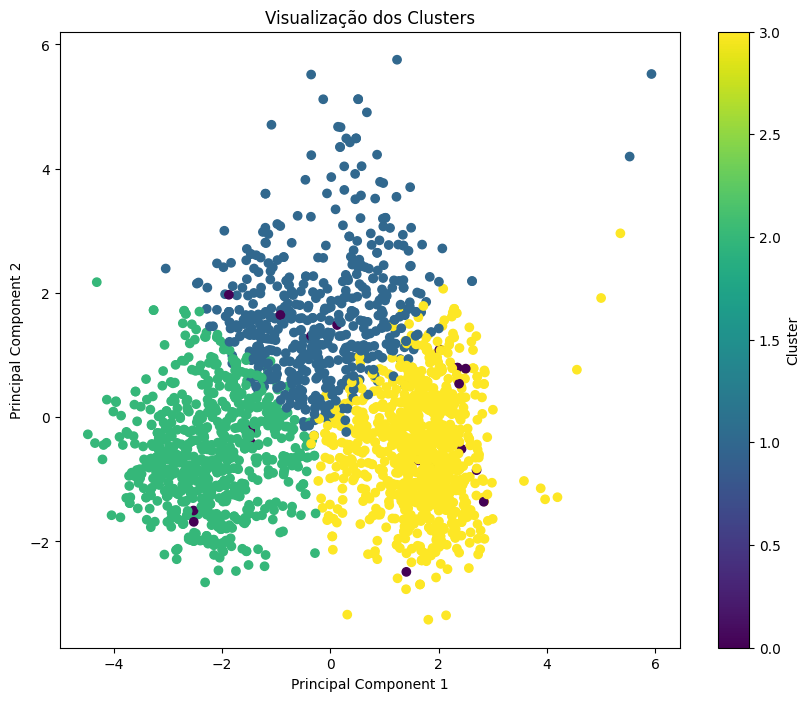

In [230]:
principaldf_test['Cluster'] = cluster_labels

plt.figure(figsize=(10, 8))
plt.scatter(principaldf_test['principal component 1'], principaldf_test['principal component 2'], c=principaldf_test['Cluster'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Visualização dos Clusters')
plt.colorbar(label='Cluster')
plt.show()

In [231]:
cluster_analysis = principaldf_test.groupby('Cluster').mean()
print(cluster_analysis)
#Cluster 0 - roxo
#Cluster 1 - azul
#Cluster 2 - verde
#Cluster 3 - amarelo

         principal component 1  principal component 2
Cluster                                              
0                     0.786186              -0.063387
1                    -0.183269               1.613205
2                    -2.181252              -0.557575
3                     1.652712              -0.521637
